In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import arviz as az
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cellbayesassay as cba
import os.path
import re
import warnings
import attila_utils

In [2]:
data = cba.get_data('../../resources/cell-based-assays/raw-data-cleaned-by-tina-CO28151-draft1.xlsx', 'Data')
data

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity
0,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,4010.00000
1,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,6280.00000
2,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,27790.00000
3,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,32560.00000
4,CO28151,Aβ release (H4 cells),Aβ38,1,1,TI2,Phenamil methanesulfonate salt,c1,1.000000e-04,-4.0,20670.00000
...,...,...,...,...,...,...,...,...,...,...,...
1633,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,53839.31290
1634,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,58911.37592
1635,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,50964.09701
1636,CO28151,Aβ clearance (BV2 cells),Aβ42 SN,2,2,VC,,NaN,1.000000e-09,-9.0,NaN


In [3]:
study = 'CO28151'
exper = 'Aβ clearance (BV2 cells)'
assay = 'Aβ42 Ly'
TI = 'TI13'
data_reshaped = cba.extract_regr_data(study, exper, assay, TI, data, return_data_reshaped=True)
data_reshaped

,Study,Experiment,Assay,Batch,Plate,TI,Name,conc,concentration,conc_log10,Activity,std_activity
1170,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.29,0.091680
1171,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.33,0.104326
1172,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.24,0.075873
1173,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.09,0.028453
1174,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.42,0.132778
1175,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,VC,,VC,1.000000e-09,-9.00000,0.69,0.218136
1194,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.05,0.015807
1195,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.70,0.221297
1196,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.75,0.237104
1197,CO28151,Aβ clearance (BV2 cells),Aβ42 Ly,1,4,TI13,Liraglutide,c1,1.000000e-05,-5.00000,0.35,0.110649


In [4]:
maindir = '../../results/2024-02-14-cell-bayes/'

if not os.path.exists(maindir + 'idatas/fpaths.csv'):
    idatadf = cba.fit_multiple_units(data, unit_list=None)
    idatas = idatadf.idata
    fpathdf = cba.idatas_to_netcdf(idatas, subdir='idatas/', maindir=maindir)
    print('idatas written to netcdf')
else:
    idatas = cba.idatas_from_netcdf(subdir='idatas/', maindir=maindir)
    print('idatas read from netcdf')

idatas = cba.sort_index_TI(idatas)
idatas

idatas read from netcdf


study    experiment                assay    TI  
CO28151  Aβ clearance (BV2 cells)  Aβ42 Ly  TI1     (posterior, log_likelihood, sample_stats, obse...
                                            TI2     (posterior, log_likelihood, sample_stats, obse...
                                            TI3     (posterior, log_likelihood, sample_stats, obse...
                                            TI4     (posterior, log_likelihood, sample_stats, obse...
                                            TI5     (posterior, log_likelihood, sample_stats, obse...
                                                                          ...                        
         Aβ release (H4 cells)     Aβ42     TI11    (posterior, log_likelihood, sample_stats, obse...
                                            TI12    (posterior, log_likelihood, sample_stats, obse...
                                            TI13    (posterior, log_likelihood, sample_stats, obse...
                                 

## Fitted curves: posterior sample 

In [5]:
plot_sampled_curves = False
fpath_suffix = '' if plot_sampled_curves else '-no-curves'

def assay_plotter(experiment, assay, plot_sampled_curves=plot_sampled_curves, compound_name_title=True):
    unit_list = idatas.loc(axis=0)[:, experiment, assay, :].index.to_numpy()
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, compound_name_title=compound_name_title)
    fig.suptitle(experiment + '\n' + assay)
    return((fig, ax))


/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:267: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-clearance-BV2-SN-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-SN-no-curves.pdf']

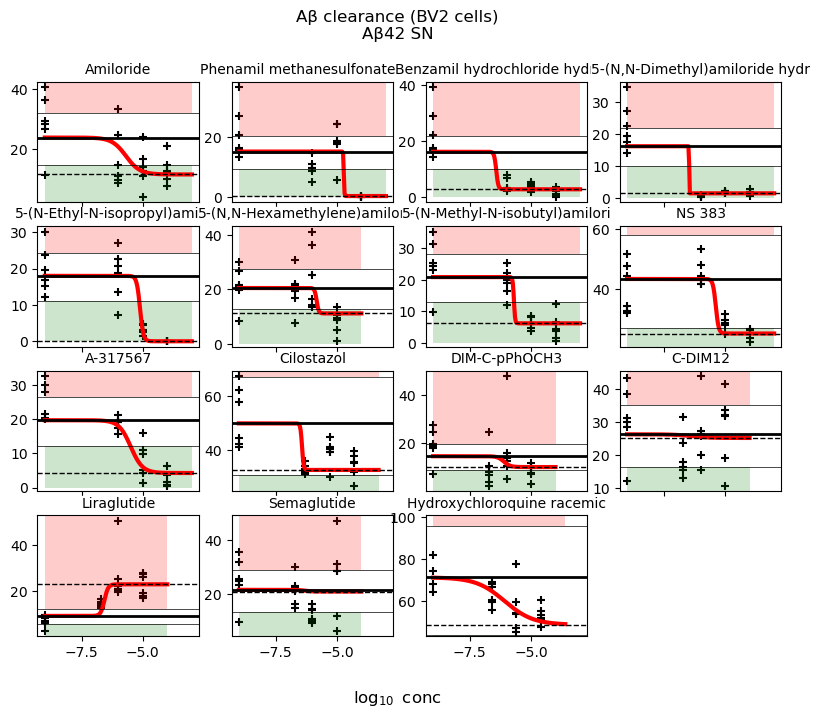

In [6]:
fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 SN')
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-SN' + fpath_suffix)

['named-figure/sampled-curves-Ab-clearance-BV2-Ly-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-Ly-no-curves.pdf']

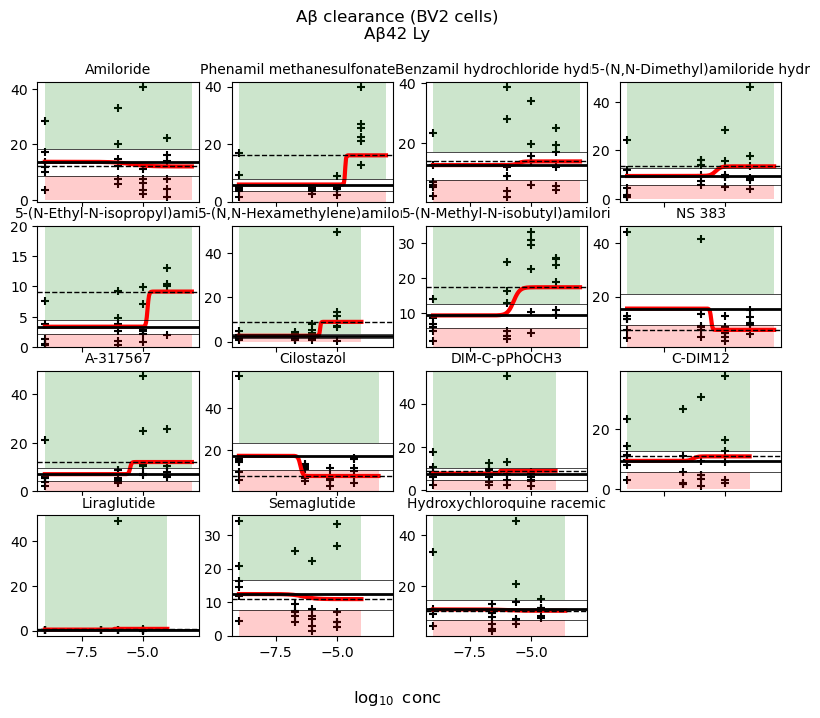

In [7]:
fig, ax = assay_plotter('Aβ clearance (BV2 cells)', 'Aβ42 Ly')
ax[1,0].set_ylim(0, 20)
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-Ly' + fpath_suffix)

['named-figure/sampled-curves-Ab-release-H4-Ab38-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab38-no-curves.pdf']

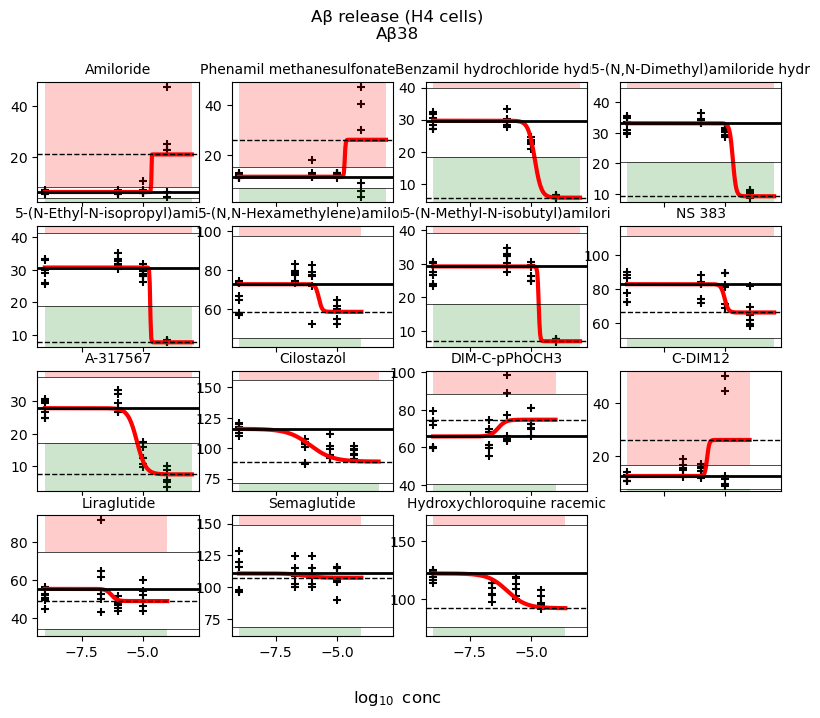

In [8]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ38')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab38' + fpath_suffix)

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:267: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))
/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:267: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-release-H4-Ab40-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab40-no-curves.pdf']

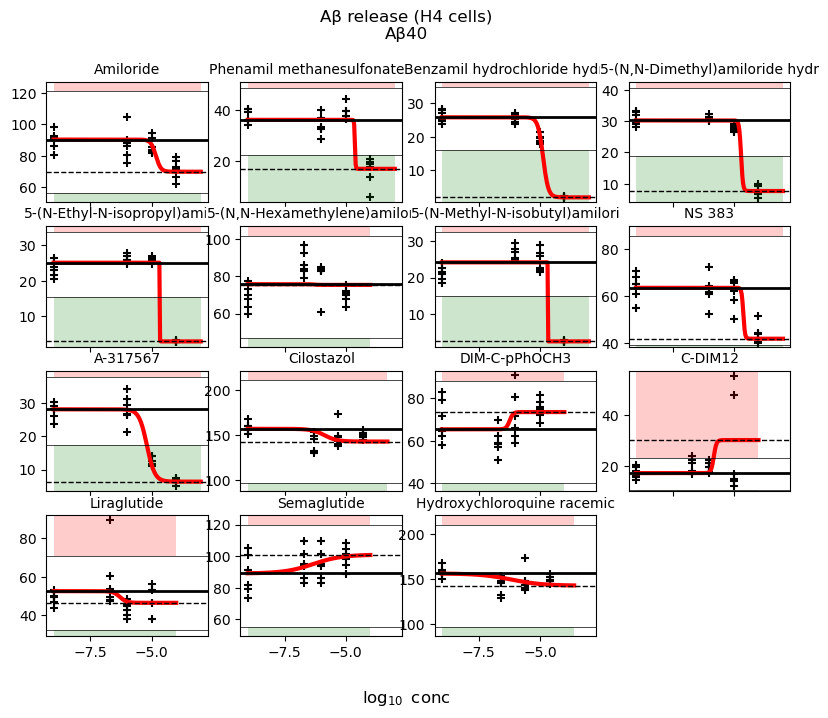

In [9]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ40')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab40' + fpath_suffix)

['named-figure/sampled-curves-Ab-release-H4-Ab42-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-Ab42-no-curves.pdf']

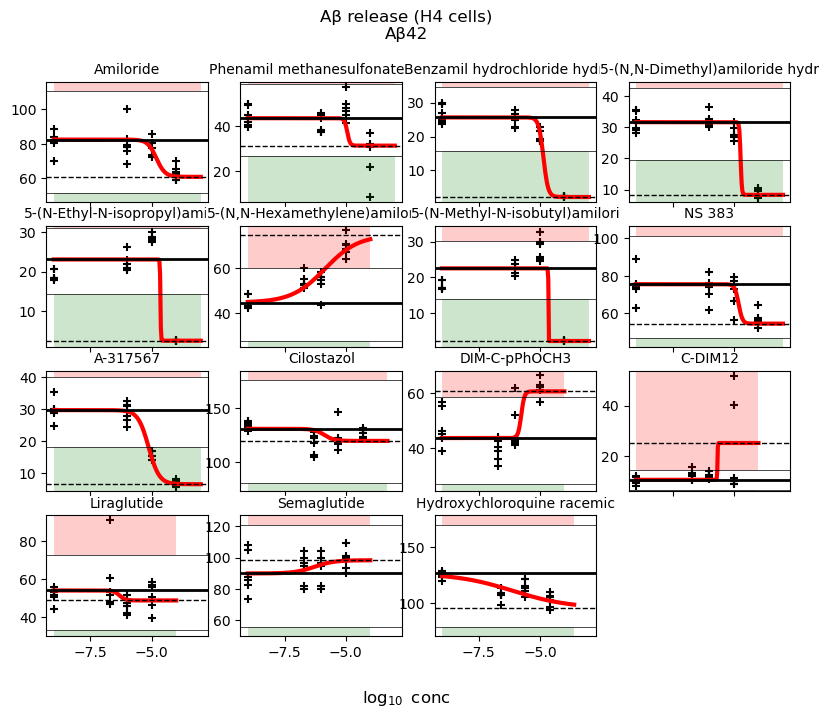

In [10]:
fig, ax = assay_plotter('Aβ release (H4 cells)', 'Aβ42')
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-Ab42' + fpath_suffix)

## Fit diagnostics

In [11]:
poor_fits = [
    ('CO28151', 'Aβ clearance (BV2 cells)', 'Aβ42 Ly', 'TI13'),
    ('CO28151', 'Aβ release (H4 cells)', 'Aβ38', 'TI4'),
]

In [12]:
cba.get_diagnostics_series(idatas, az.ess)

In [13]:
cba.get_diagnostics_series(idatas, az.rhat, vmax=1.1)

In [14]:
cba.get_diagnostics_series(idatas, az.mcse, vmax=10)

In [15]:
df = cba.get_diagnostics_series(idatas, az.mcse, return_df=True).drop('k', level='parameter', axis=0)
df.style.format(precision=3).background_gradient(axis=None, vmin=df.min().min(), vmax=df.max().max(), cmap='hot')

['named-figure/ess.png', 'named-figure/ess.pdf']

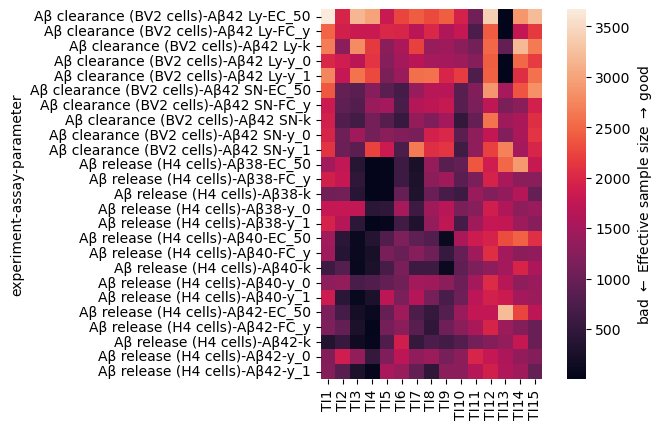

In [16]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=True)
attila_utils.savefig(g.figure, 'ess')

['named-figure/ess-noyticklabels.png', 'named-figure/ess-noyticklabels.pdf']

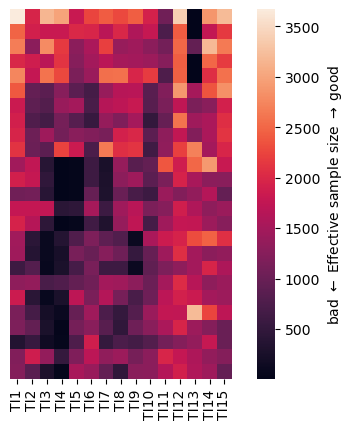

In [17]:
g = cba.diagnostics_series_heatmap(idatas, az.ess, yticklabels=False)
attila_utils.savefig(g.figure, 'ess-noyticklabels')

['named-figure/rhat.png', 'named-figure/rhat.pdf']

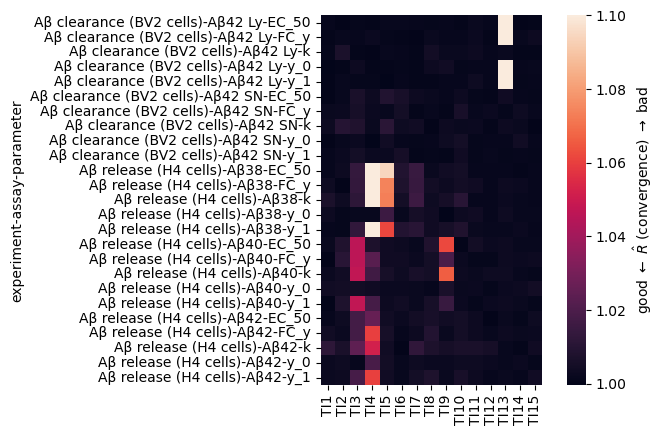

In [18]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=True, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat')

['named-figure/rhat-noyticklabels.png', 'named-figure/rhat-noyticklabels.pdf']

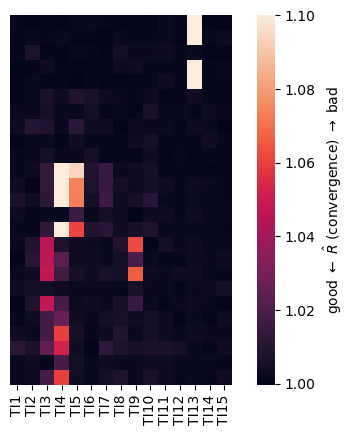

In [19]:
g = cba.diagnostics_series_heatmap(idatas, az.rhat, yticklabels=False, vmax=1.1)
attila_utils.savefig(g.figure, 'rhat-noyticklabels')

['named-figure/mcse.png', 'named-figure/mcse.pdf']

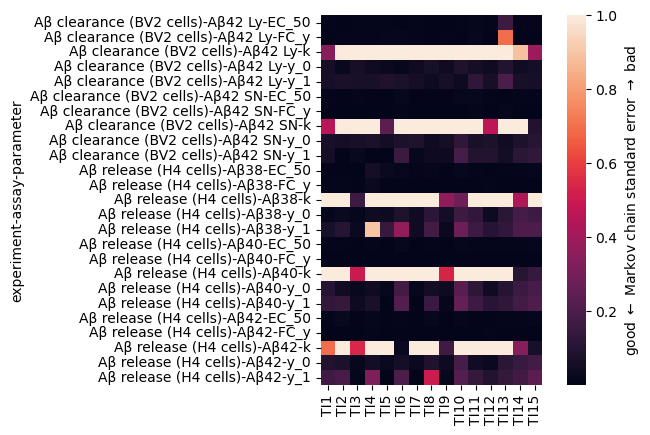

In [20]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=True, vmax=1)
attila_utils.savefig(g.figure, 'mcse')

['named-figure/mcse-noyticklabels.png', 'named-figure/mcse-noyticklabels.pdf']

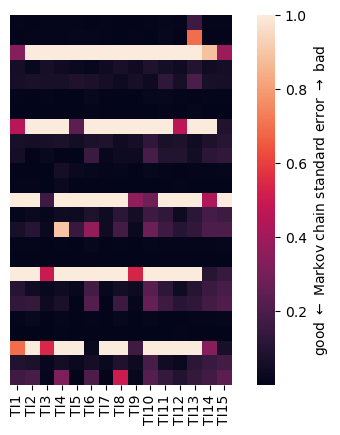

In [21]:
g = cba.diagnostics_series_heatmap(idatas, az.mcse, yticklabels=False, vmax=1)
attila_utils.savefig(g.figure, 'mcse-noyticklabels')

In [22]:
fpath = '../../results/2024-02-14-cell-bayes/H102_posteriors.csv'
if not os.path.exists(fpath):
    H102_posteriors = cba.get_H102_posterior_from_idatas(idatas, poor_fits)
    H102_posteriors = cba.sort_index_TI(H102_posteriors)
    H102_posteriors['name'] = cba.get_TI_name().xs('CO28151', level=0, axis=0).loc[H102_posteriors.index.get_level_values('TI'), 'Name'].to_list()
    H102_posteriors.to_csv(fpath)
else:
    H102_posteriors = pd.read_csv(fpath, index_col=[0, 1, 2, 3])
    
H102_posteriors

H1       H0       H2  \
study   experiment               assay   TI                                
CO28151 Aβ clearance (BV2 cells) Aβ42 Ly TI1   0.07300  0.77600  0.15100   
                                         TI2   0.99925  0.00075  0.00000   
                                         TI3   0.25525  0.69925  0.04550   
                                         TI4   0.61225  0.38000  0.00775   
                                         TI5   0.99875  0.00125  0.00000   
...                                                ...      ...      ...   
        Aβ release (H4 cells)    Aβ42    TI11  0.00000  0.37325  0.62675   
                                         TI12  0.00000  0.00200  0.99800   
                                         TI13  0.02650  0.95625  0.01725   
                                         TI14  0.00025  0.95300  0.04675   
                                         TI15  0.06325  0.93675  0.00000   

                                                                                  name  
study   experiment               assay   TI                                             
CO28151 Aβ clearance (BV2 cells) Aβ42 Ly TI1                                 Amiloride  
                                         TI2            Phenamil methanesulfonate salt  
                                         TI3            Benzamil hydrochloride hydrate  
                                         TI4   5-(N,N-Dimethyl)amiloride hydrochloride  
                                         TI5          5-(N-Ethyl-N-isopropyl)amiloride  
...                                                                                ...  
        Aβ release (H4 cells)    Aβ42    TI11                            DIM-C-pPhOCH3  
                                         TI12                                  C-DIM12  
                                         TI13                              Liraglutide  
                                         TI14                              Semaglutide  
                                         TI15               Hydroxychloroquine racemic  

[75 rows x 4 columns]

In [23]:
def reshape_H102_posteriors(H102_posteriors, show_names=True):
    if show_names:
        val = H102_posteriors.copy().set_index('name', append=True).droplevel('TI')
    else:
        val = H102_posteriors.copy().drop('name', axis=1)
    val = val.xs('CO28151', level=0, axis=0)
    level = val.index.to_frame().shape[1] - 1
    val = val.unstack(level=level, sort=False).swaplevel(axis=1)
    return(val)

H102_posteriors_wide = reshape_H102_posteriors(H102_posteriors)
H102_posteriors_wide

name                             Amiloride Phenamil methanesulfonate salt  \
                                        H1                             H1   
experiment               assay                                              
Aβ clearance (BV2 cells) Aβ42 Ly   0.07300                        0.99925   
                         Aβ42 SN   0.86200                        0.99975   
Aβ release (H4 cells)    Aβ38      0.00000                        0.00000   
                         Aβ40      0.02925                        0.99025   
                         Aβ42      0.06750                        0.19650   

name                             Benzamil hydrochloride hydrate  \
                                                             H1   
experiment               assay                                    
Aβ clearance (BV2 cells) Aβ42 Ly                        0.25525   
                         Aβ42 SN                        1.00000   
Aβ release (H4 cells)    Aβ38                           1.00000   
                         Aβ40                           1.00000   
                         Aβ42                           1.00000   

name                             5-(N,N-Dimethyl)amiloride hydrochloride  \
                                                                      H1   
experiment               assay                                             
Aβ clearance (BV2 cells) Aβ42 Ly                                 0.61225   
                         Aβ42 SN                                 1.00000   
Aβ release (H4 cells)    Aβ38                                        NaN   
                         Aβ40                                    1.00000   
                         Aβ42                                    1.00000   

name                             5-(N-Ethyl-N-isopropyl)amiloride  \
                                                               H1   
experiment               assay                                      
Aβ clearance (BV2 cells) Aβ42 Ly                          0.99875   
                         Aβ42 SN                          1.00000   
Aβ release (H4 cells)    Aβ38                             1.00000   
                         Aβ40                             1.00000   
                         Aβ42                             1.00000   

name                             5-(N,N-Hexamethylene)amiloride  \
                                                             H1   
experiment               assay                                    
Aβ clearance (BV2 cells) Aβ42 Ly                        1.00000   
                         Aβ42 SN                        0.71525   
Aβ release (H4 cells)    Aβ38                           0.03675   
                         Aβ40                           0.00325   
                         Aβ42                           0.00000   

name                             5-(N-Methyl-N-isobutyl)amiloride   NS 383  \
                                                               H1       H1   
experiment               assay                                               
Aβ clearance (BV2 cells) Aβ42 Ly                          0.93325  0.00025   
                         Aβ42 SN                          1.00000  0.83825   
Aβ release (H4 cells)    Aβ38                             1.00000  0.03150   
                         Aβ40                             1.00000  0.19875   
                         Aβ42                             1.00000  0.10550   

name                             A-317567 Cilostazol  ...  \
                                       H1         H1  ...   
experiment               assay                        ...   
Aβ clearance (BV2 cells) Aβ42 Ly  0.84350    0.00000  ...   
                         Aβ42 SN  0.99925    0.25025  ...   
Aβ release (H4 cells)    Aβ38     1.00000    0.05850  ...   
                         Aβ40     1.00000    0.00225  ...   
                         Aβ42     1.00000    0.00450  ...   

name                             

In [24]:
H102_posteriors_exper_mean_wide = H102_posteriors_wide.groupby('experiment').mean()
H102_posteriors_exper_mean_wide

name,Amiloride,Phenamil methanesulfonate salt,Benzamil hydrochloride hydrate,"5-(N,N-Dimethyl)amiloride hydrochloride",5-(N-Ethyl-N-isopropyl)amiloride,"5-(N,N-Hexamethylene)amiloride",5-(N-Methyl-N-isobutyl)amiloride,NS 383,A-317567,Cilostazol,...,"5-(N,N-Hexamethylene)amiloride",5-(N-Methyl-N-isobutyl)amiloride,NS 383,A-317567,Cilostazol,DIM-C-pPhOCH3,C-DIM12,Liraglutide,Semaglutide,Hydroxychloroquine racemic
,H1,H1,H1,H1,H1,H1,H1,H1,H1,H1,...,H2,H2,H2,H2,H2,H2,H2,H2,H2,H2
experiment,,,,,,,,,,,,,,,,,,,,,
Aβ clearance (BV2 cells),0.46750,0.999500,0.627625,0.806125,0.999375,0.857625,0.966625,0.419250,0.921375,0.125125,...,0.006875,0.0,0.430625,0.001625,0.466625,0.08550,0.056875,0.997750,0.119750,0.058875
Aβ release (H4 cells),0.03225,0.395583,1.000000,1.000000,1.000000,0.013333,1.000000,0.111917,1.000000,0.021750,...,0.341250,0.0,0.000000,0.000000,0.000250,0.26325,0.977917,0.011167,0.043167,0.000083


In [25]:
H102_posteriors_grand_mean = H102_posteriors_exper_mean_wide.mean()
H102_posteriors_grand_mean_wide = H102_posteriors_grand_mean.unstack(level=1)
H102_posteriors_grand_mean_wide

,H1,H0,H2
name,,,
Amiloride,0.249875,0.545708,0.204417
Phenamil methanesulfonate salt,0.697542,0.136000,0.166458
Benzamil hydrochloride hydrate,0.813813,0.174813,0.011375
"5-(N,N-Dimethyl)amiloride hydrochloride",0.903062,0.095000,0.001937
5-(N-Ethyl-N-isopropyl)amiloride,0.999688,0.000312,0.000000
"5-(N,N-Hexamethylene)amiloride",0.435479,0.390458,0.174063
5-(N-Methyl-N-isobutyl)amiloride,0.983313,0.016687,0.000000
NS 383,0.265583,0.519104,0.215312
A-317567,0.960688,0.038500,0.000812


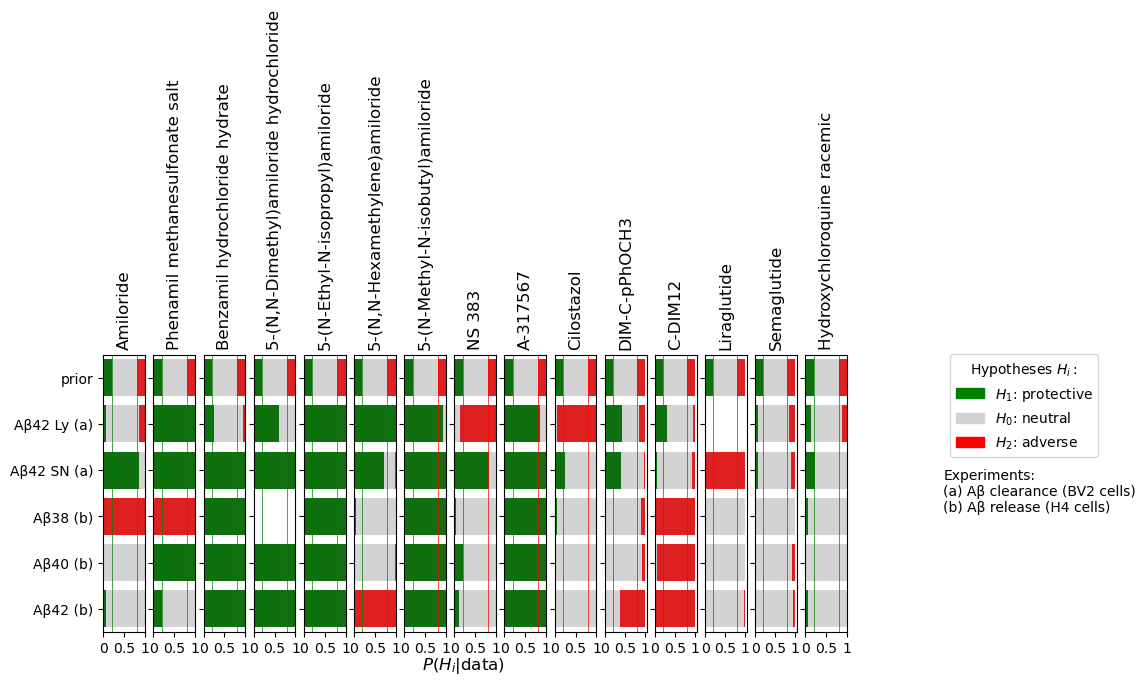

In [26]:
def my_barchart(H102_posteriors_wide, show_names=True, e2l_textbox=True, legend=True, figsize=(9.6, 3.6)):
    #fig, ax = cba.barchart_H102_posteriors(reshape_H102_posteriors(H102_posteriors, show_names=show_names), e2l_textbox=e2l_textbox, legend=legend)
    fig, ax = cba.barchart_H102_posteriors(H102_posteriors_wide, e2l_textbox=e2l_textbox, legend=legend)
    fig.set_size_inches(*figsize)
    fig.supylabel('')
    if show_names:
        for axi in ax:
            axi.set_title(axi.get_title(), rotation=90)
    return((fig, ax))

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors_wide, show_names=True)
    attila_utils.savefig(fig, 'barchart-H102')

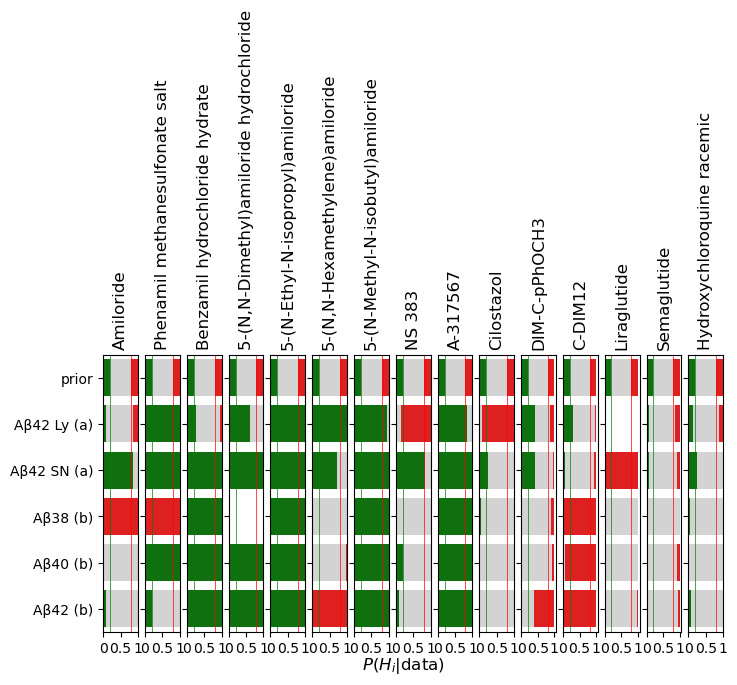

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors_wide, show_names=True, e2l_textbox=False, legend=False, figsize=(8, 3.6))
    attila_utils.savefig(fig, 'barchart-H102-nolegend')

## Aggregation

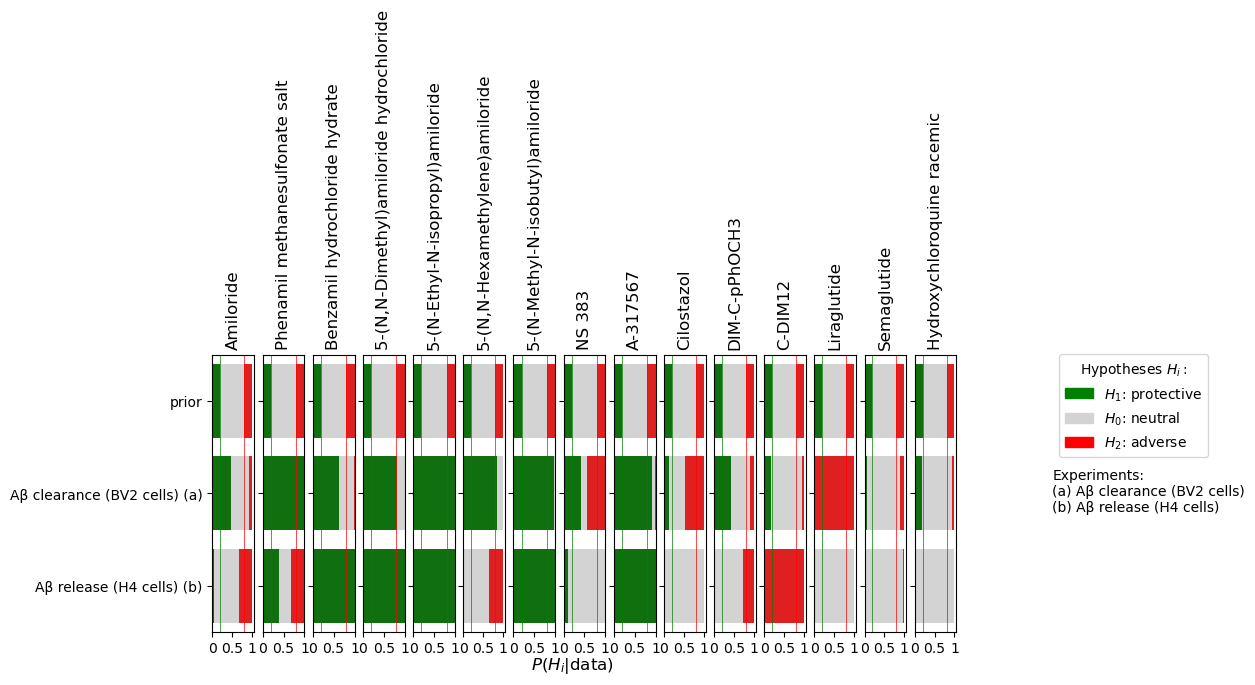

In [28]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fig, ax = my_barchart(H102_posteriors_exper_mean_wide, show_names=True)
    attila_utils.savefig(fig, 'barchart-H102-exper-mean')

['named-figure/barchart-H102-grand-mean.png',
 'named-figure/barchart-H102-grand-mean.pdf']

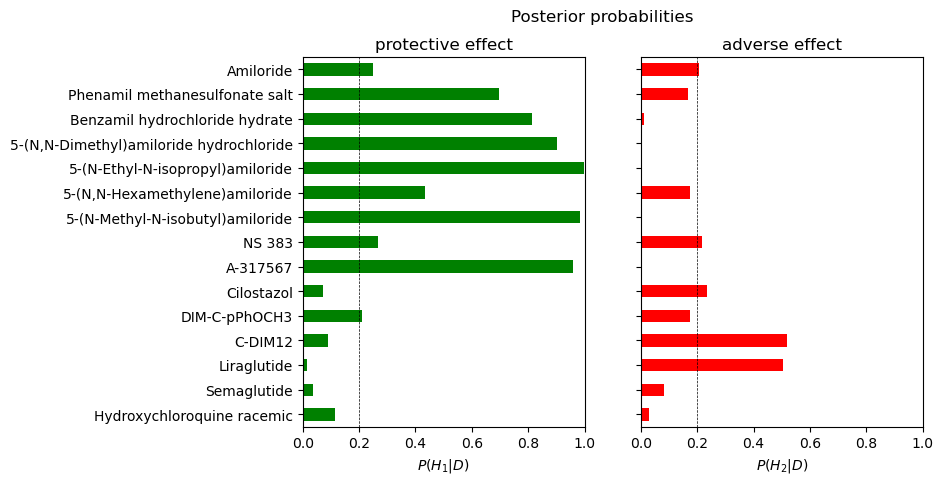

In [29]:
def grand_mean_barchart(H102_posteriors_grand_mean_wide):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4.8))
    for axi, H, effect, color in zip(ax, [1, 2], ['protective', 'adverse'], ['green', 'red']):
    #for axi, H, effect, color in zip(ax, ['H1', 'H2'], ['protective', 'adverse'], ['green', 'red']):
        H102_posteriors_grand_mean_wide['H' + str(H)].plot(kind='barh', ax=axi, color=color)
        axi.set_ylabel('')
        axi.set_title(effect + ' effect')
        axi.set_xlim(0, 1)
        axi.axvline(0.2, linestyle='dashed', color='k', linewidth=0.5)
        axi.set_xlabel(r'$P(H_{} | D)$'.format(H))
        if not axi is ax[0]:
            axi.set_yticklabels('')
    fig.suptitle('Posterior probabilities')
    return((fig, ax))

fig, ax = grand_mean_barchart(H102_posteriors_grand_mean_wide.loc[::-1, :])
attila_utils.savefig(fig, 'barchart-H102-grand-mean')

['named-figure/barchart-H102-grand-mean-sorted.png',
 'named-figure/barchart-H102-grand-mean-sorted.pdf']

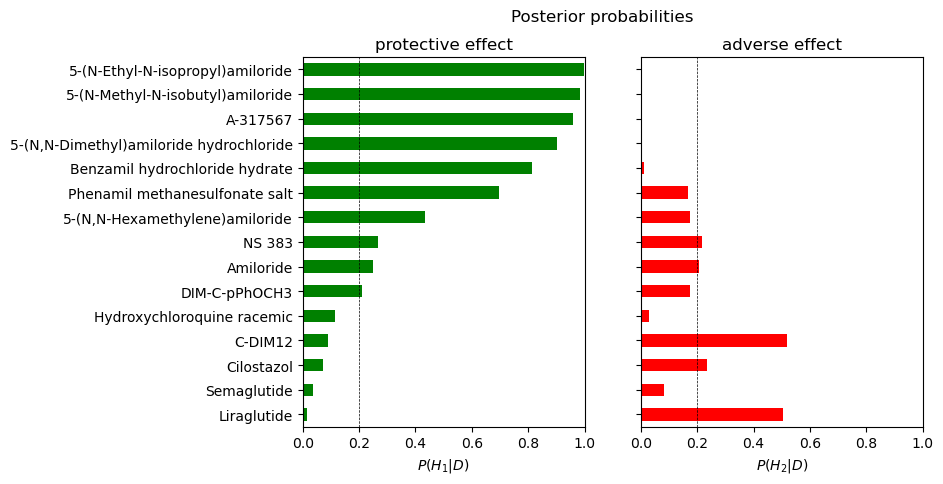

In [30]:
fig, ax = grand_mean_barchart(H102_posteriors_grand_mean_wide.sort_values('H1', ascending=True))
attila_utils.savefig(fig, 'barchart-H102-grand-mean-sorted')

### Bayes factors

In [31]:
alternative_hypotheses = ['H1', 'H2']
l = [H102_posteriors_grand_mean_wide.apply(lambda r: r.loc['H' + str(i)] / r.loc['H0'], axis=1).to_frame('BF_' + str(i) + '0') for i in [1, 2]]
BFs = pd.concat(l, axis=1)
twice_log_BFs = BFs.applymap(lambda x: 2 * np.log(x))
twice_log_BFs

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_63680/1539267677.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  twice_log_BFs = BFs.applymap(lambda x: 2 * np.log(x))
/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_63680/1539267677.py:4: RuntimeWarning: divide by zero encountered in log
  twice_log_BFs = BFs.applymap(lambda x: 2 * np.log(x))


,BF_10,BF_20
name,,
Amiloride,-1.562248,-1.963849
Phenamil methanesulfonate salt,3.269815,0.404180
Benzamil hydrochloride hydrate,3.076032,-5.464592
"5-(N,N-Dimethyl)amiloride hydrochloride",4.503830,-7.784957
5-(N-Ethyl-N-isopropyl)amiloride,16.141187,-inf
"5-(N,N-Hexamethylene)amiloride",0.218251,-1.615814
5-(N-Methyl-N-isobutyl)amiloride,8.152534,-inf
NS 383,-1.340352,-1.760028
A-317567,6.433982,-7.716595


['named-figure/barchart-BF.png', 'named-figure/barchart-BF.pdf']

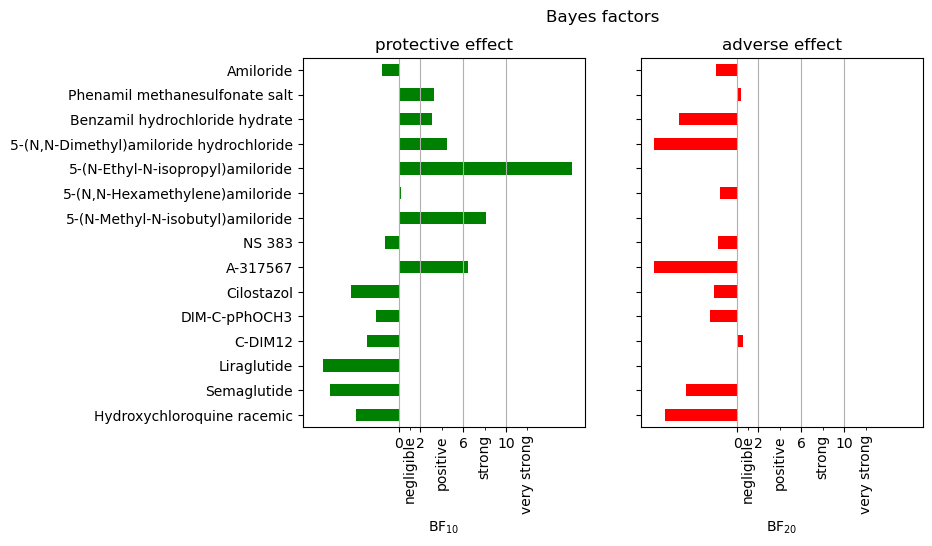

In [32]:
def BF_barchart(twice_log_BFs):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 4.8))
    alternative_hypotheses = [1, 2]
    for axi, H, effect, color in zip(ax, alternative_hypotheses, ['protective', 'adverse'], ['green', 'red']):
        colname = 'BF_' + str(H) + '0'
        twice_log_BFs[colname].plot(kind='barh', ax=axi, color=color)
        axi.set_ylabel('')
        axi.set_title(effect + ' effect')
        xticks_major = [0, 2, 6, 10]
        xticks_minor = [1, 4, 8, 12]
        axi.set_xticks(xticks_major, minor=False)
        axi.set_xticks(xticks_minor, minor=True)
        xticklabels_minor = ['negligible', 'positive', 'strong', 'very strong']
        axi.set_xticklabels(xticklabels_minor, minor=True, rotation=90)
        axi.grid(axis='x')
        axi.set_xlabel(r'$\mathrm{{BF}}_{{{}0}}$'.format(H))
        if not axi is ax[0]:
            axi.set_yticklabels('')
    fig.suptitle('Bayes factors')
    return((fig, ax))

fig, ax = BF_barchart(twice_log_BFs[::-1])
attila_utils.savefig(fig, 'barchart-BF')

['named-figure/barchart-BF-sorted.png', 'named-figure/barchart-BF-sorted.pdf']

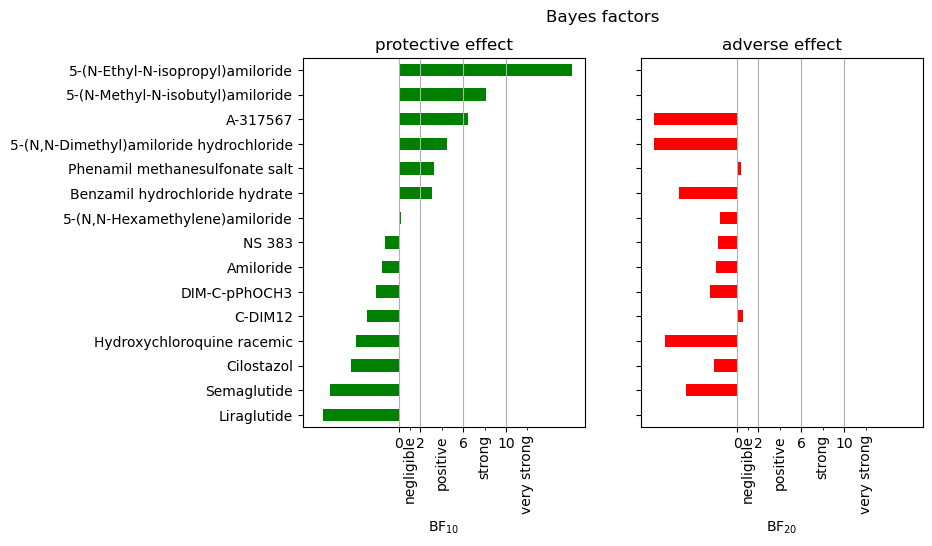

In [33]:
fig, ax = BF_barchart(twice_log_BFs.sort_values('BF_10', ascending=True))
attila_utils.savefig(fig, 'barchart-BF-sorted')

## Comparison with QPS' local frequentist analysis

In [34]:
fpath = '../../results/2023-04-20-cell-based-assays/CO28151-results.csv'
freqres = pd.read_csv(fpath, index_col=['assay', 'TI', 'conc'])
freqres['Summary'] = freqres.Summary.fillna('')
freqres

name  \
assay                       TI   conc                                   
Abeta celarance supernatant TI2  c1    Phenamil methanesulfonate salt   
                                 c2    Phenamil methanesulfonate salt   
                                 c3    Phenamil methanesulfonate salt   
                            TI3  c1    Benzamil hydrochloride hydrate   
                                 c2    Benzamil hydrochloride hydrate   
...                                                               ...   
LPS inflammation KC/GRO     TI13 c2                       Liraglutide   
                                 c3                       Liraglutide   
LPS inflammation MTT        TI13 c1                       Liraglutide   
                                 c2                       Liraglutide   
                                 c3                       Liraglutide   

                                      Bonferroni's multiple comparisons test  \
assay                       TI   conc                                          
Abeta celarance supernatant TI2  c1                                VC vs. c1   
                                 c2                                VC vs. c2   
                                 c3                                VC vs. c3   
                            TI3  c1                                VC vs. c1   
                                 c2                                VC vs. c2   
...                                                                      ...   
LPS inflammation KC/GRO     TI13 c2                               LPS vs. c2   
                                 c3                               LPS vs. c3   
LPS inflammation MTT        TI13 c1                               LPS vs. c1   
                                 c2                               LPS vs. c2   
                                 c3                               LPS vs. c3   

                                       Mean Diff, 95,00% CI of diff,  \
assay                       TI   conc                                  
Abeta celarance supernatant TI2  c1    -7889.0000      4674 to 11104   
                                 c2    -1328.0000      -1887 to 4543   
                                 c3    -4365.0000       1150 to 7580   
                            TI3  c1    -7398.0000       4830 to 9966   
                                 c2    -6674.0000       4105 to 9242   
...                                           ...                ...   
LPS inflammation KC/GRO     TI13 c2       -0.5517    -1,490 to 2,593   
                                 c3       -0.2617    -1,780 to 2,303   
LPS inflammation MTT        TI13 c1        3.0000    -14,20 to 8,199   
                                 c2        6.5000    -17,70 to 4,699   
                                 c3       -2.3330    -8,865 to 13,53   

                                      Below threshold? Summary  \
assay                       TI   conc                            
Abeta celarance supernatant TI2  c1                Yes     ***   
                                 c2                 No           
                                 c3                Yes      **   
                            TI3  c1                Yes     ***   
                                 c2                Yes     ***   
...                                                ...     ...   
LPS inflammation KC/GRO     TI13 c2                 No           
                                 c3                 No           
LPS inflammation MTT        TI13 c1                 No           
                                 c2                 No           
                                 c3                 No           

                                      Adjusted P Value   lower CL  upper CL  \
assay                       TI   conc                                         
Abeta celarance supernatant TI2  c1             <0,001 -11104.000 -4674.000   
                                 c2      

In [35]:
plot_sampled_curves = False
fpath_suffix = '' if plot_sampled_curves else '-no-curves'


def TI_plotter_ax(axi, TI, assay, experiment, study='CO28151', plot_sampled_curves=plot_sampled_curves, H102_posteriors=H102_posteriors):
    axi.set_title(assay)
    handles = [mpatches.Rectangle((0, 0), 8, 4, color=c, ec='black', linewidth=0.5, alpha=0.5) for c in ['green', 'white', 'red']]
    P_H102 = H102_posteriors.loc[study, experiment, assay, TI].drop('name').to_list()
    labels = [r'$P(H_{} \, | \, D) = {:1.2f}$'.format(i, p) for i, p in zip([1, 0, 2], P_H102)]
    axi.legend(handles, labels)
    return(axi)
    
def TI_plotter(TI, experiment, study='CO28151', plot_sampled_curves=plot_sampled_curves, H102_posteriors=H102_posteriors):
    unit_list = idatas.loc(axis=0)[:, experiment, :, TI].index.to_numpy()
    ncols = len(unit_list)
    fig, ax = cba.plot_multiple_units(unit_list, data, idatas, plot_sampled_curves=plot_sampled_curves, ncols=ncols, nrows=1, figsize=(4 * ncols, 2.4))
    for axi, assay in zip(ax, [x[2] for x in unit_list]):
        axi = TI_plotter_ax(axi, TI, assay, experiment, study=study, plot_sampled_curves=plot_sampled_curves, H102_posteriors=H102_posteriors)
    fig.supxlabel('')
    compound = cba.get_TI_name().loc[(study, TI), 'Name']
    fig.suptitle(compound, va='bottom')
    return((fig, ax))

def freq_res_plotter_ax(axi, TI, assay, assay_freq, freqres=freqres):
    conc_l = ['c3', 'c2', 'c1']
    dat = freqres.loc[assay_freq, TI, :].loc[conc_l]
    concentrations = dat.loc[:, 'concentration'].to_list()
    yticks = range(len(concentrations))
    rectangles = axi.bar(data=dat, x=yticks, height='Mean Diff,', yerr='error')
    axi.bar_label(rectangles, labels=dat.Summary, label_type='edge')
    axi.set_title(assay)
    axi.set_xticks(range(len(conc_l)))
    axi.set_xticklabels(conc_l)
    axi.axhline(0, linewidth=0.5, linestyle='solid', color='k')
    return(axi)


def freq_res_plotter(TI='TI6', experiment='Aβ clearance (BV2 cells)', freqres=freqres):
    namecorr = pd.read_csv('freqres-name-correction.csv', index_col=['experiment', 'assay'])
    namecorr = namecorr.xs(experiment, level='experiment', axis=0)['assay (freq)']
    assay_freq_l = namecorr.to_list()
    assay_l = namecorr.index.to_list()
    ncols = len(assay_l)
    conc_l = ['c3', 'c2', 'c1']
    fig, ax = plt.subplots(ncols=ncols, nrows=1, figsize=(4 * ncols, 2.4))
    for axi, assay, assay_freq in zip(ax, assay_l, assay_freq_l):
        axi = freq_res_plotter_ax(axi, TI, assay, assay_freq, freqres=freqres)
    compound = cba.get_TI_name().loc[(study, TI), 'Name']
    fig.suptitle(compound, va='bottom')
    return((fig, ax))

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:261: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/feq-bayes-dose-response-TI7.png',
 'named-figure/feq-bayes-dose-response-TI7.pdf']

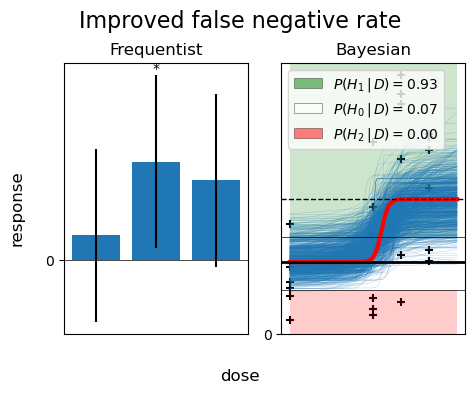

In [36]:
def freq_res_TI_plotter(study='CO28151', exper='Aβ clearance (BV2 cells)', assay='Aβ42 Ly', assay_freq='Abeta celarance intracellular', TI='TI6', idatas=idatas, data=data, H102_posteriors=H102_posteriors, which_rate='positive'):
    fig, ax = plt.subplots(1, 2, figsize=(4.8, 3.6))
    ax[0] = freq_res_plotter_ax(ax[0], TI=TI, assay=assay, assay_freq=assay_freq, freqres=freqres)
    fpath = '/Users/jonesa7/CTNS/resources/cell-based-assays/ideal-effects.csv'
    ideal_H1_increase = pd.read_csv(fpath, index_col=['experiment (nice)', 'assay (nice)'],
                                    usecols=['experiment', 'assay', 'experiment (nice)', 'assay (nice)',
                                             'H1_increase', 'ideal effect'])
    H1_increase = ideal_H1_increase.loc[(exper, assay), 'H1_increase']
    ax[1] = cba.plot_single_unit(ax[1], study=study, exper=exper, assay=assay, TI=TI, data=data, idatas=idatas, H1_increase=H1_increase)
    ax[1] = TI_plotter_ax(ax[1], TI, assay, exper, study=study, plot_sampled_curves=plot_sampled_curves, H102_posteriors=H102_posteriors)
    for axi in ax:
        axi.set_xlabel('')
        axi.set_ylabel('')
        axi.set_xticks([])
        axi.set_yticks([0])
    ax[0].set_title('Frequentist')
    ax[1].set_title('Bayesian')
    fig.supxlabel('dose')
    fig.supylabel('response')
    plt.tight_layout()
    fig.suptitle('Improved false '+ which_rate + ' rate', fontsize=16, y=1.05)
    return((fig, ax))

TI = 'TI7'
fig, ax = freq_res_TI_plotter(TI=TI, which_rate='negative')
attila_utils.savefig(fig, 'feq-bayes-dose-response-' + TI)

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:261: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/feq-bayes-dose-response-TI6.png',
 'named-figure/feq-bayes-dose-response-TI6.pdf']

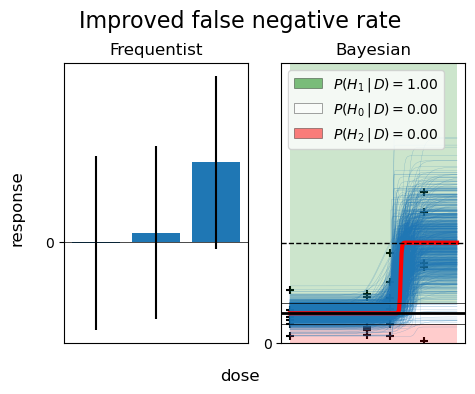

In [37]:
TI = 'TI6'
fig, ax = freq_res_TI_plotter(TI=TI, which_rate='negative')
ax[1].set_ylim(0, 25)
attila_utils.savefig(fig, 'feq-bayes-dose-response-' + TI)

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:261: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/feq-bayes-dose-response-TI4.png',
 'named-figure/feq-bayes-dose-response-TI4.pdf']

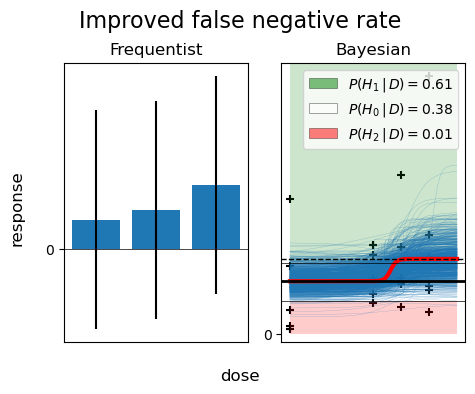

In [38]:
TI = 'TI4'
fig, ax = freq_res_TI_plotter(TI=TI, which_rate='negative')
attila_utils.savefig(fig, 'feq-bayes-dose-response-' + TI)

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:261: RuntimeWarning: overflow encountered in exp
  yy = y_1 + (y_0 - y_1) / (1 + np.exp(k * (xx - EC_50)))


['named-figure/feq-bayes-dose-response-TI1.png',
 'named-figure/feq-bayes-dose-response-TI1.pdf']

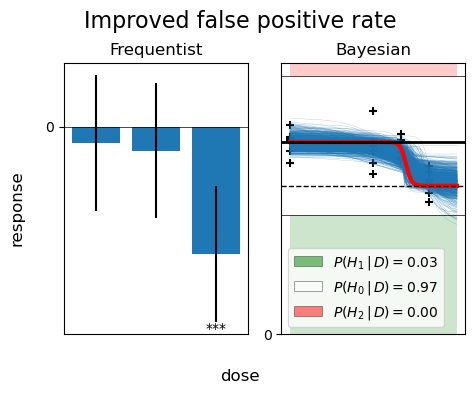

In [39]:
TI = 'TI1'
exper = 'Aβ release (H4 cells)'
#study='CO28151', exper='Aβ clearance (BV2 cells)', assay='Aβ42 Ly', assay_freq='Abeta celarance intracellular',
fig, ax = freq_res_TI_plotter(study='CO28151', exper=exper, assay='Aβ40', assay_freq='Abeta secretion 1-40', TI=TI, which_rate='positive')
attila_utils.savefig(fig, 'feq-bayes-dose-response-' + TI)

### Bayesian regression eliminates false negatives

['named-figure/sampled-curves-Ab-clearance-BV2-TI6-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI6-no-curves.pdf']

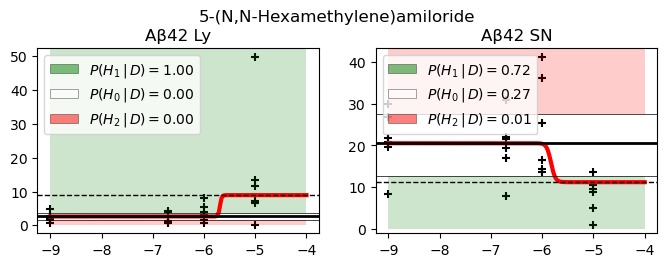

In [40]:
TI = 'TI6'
experiment = 'Aβ clearance (BV2 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI + fpath_suffix) 

['named-figure/freqres-Ab-clearance-BV2-TI6.png',
 'named-figure/freqres-Ab-clearance-BV2-TI6.pdf']

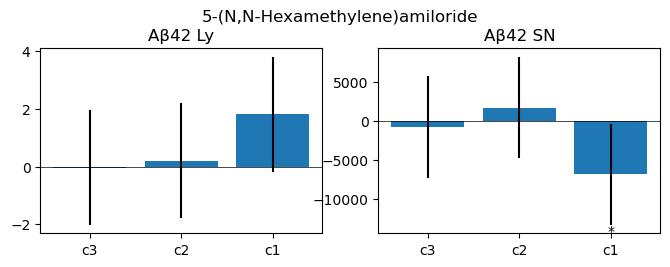

In [41]:
fig, ax = freq_res_plotter(TI, experiment)
attila_utils.savefig(fig, 'freqres-Ab-clearance-BV2-' + TI) 

/Users/jonesa7/CTNS/notebooks/src/cellbayesassay.py:267: RuntimeWarning: overflow encountered in exp
  y_sigmoid_1_mean = y_1_mean + (y_0_mean - y_1_mean) / (1 + np.exp(k_mean * (xx - EC_50_mean)))


['named-figure/sampled-curves-Ab-clearance-BV2-TI4-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI4-no-curves.pdf']

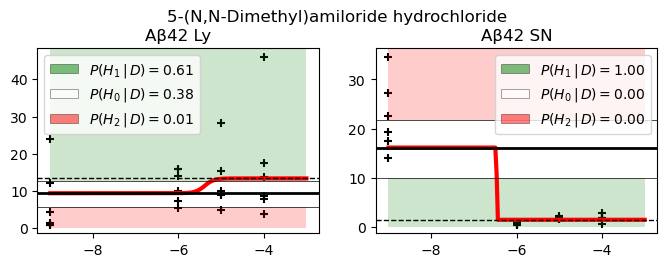

In [42]:
TI = 'TI4'
experiment = 'Aβ clearance (BV2 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI + fpath_suffix) 

['named-figure/freqres-Ab-clearance-BV2-TI4.png',
 'named-figure/freqres-Ab-clearance-BV2-TI4.pdf']

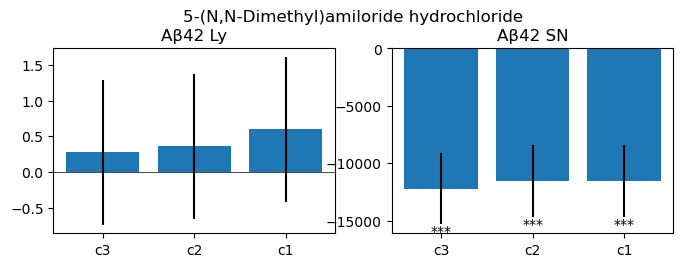

In [43]:
fig, ax = freq_res_plotter(TI, experiment)
attila_utils.savefig(fig, 'freqres-Ab-clearance-BV2-' + TI) 

['named-figure/sampled-curves-Ab-clearance-BV2-TI7-no-curves.png',
 'named-figure/sampled-curves-Ab-clearance-BV2-TI7-no-curves.pdf']

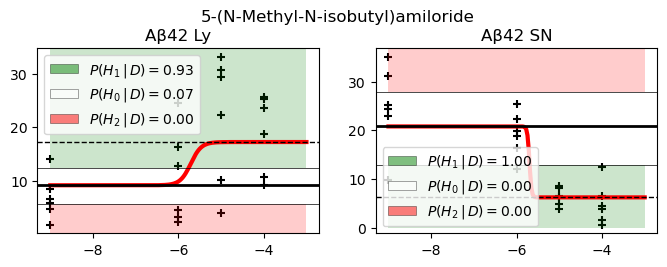

In [44]:
TI = 'TI7'
experiment = 'Aβ clearance (BV2 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-clearance-BV2-' + TI + fpath_suffix) 

['named-figure/freqres-Ab-clearance-BV2-TI7.png',
 'named-figure/freqres-Ab-clearance-BV2-TI7.pdf']

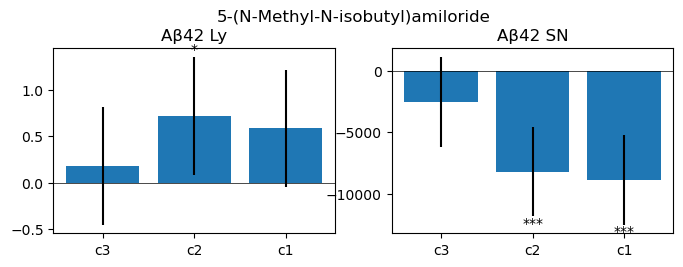

In [45]:
fig, ax = freq_res_plotter(TI, experiment)
attila_utils.savefig(fig, 'freqres-Ab-clearance-BV2-' + TI) 

['named-figure/sampled-curves-Ab-release-H4-TI12-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-TI12-no-curves.pdf']

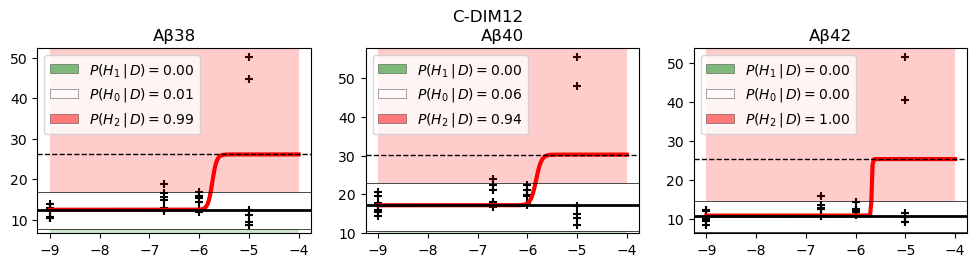

In [47]:
TI = 'TI12'
experiment = 'Aβ release (H4 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI + fpath_suffix) 

['named-figure/freqres-Ab-release-H4-TI12.png',
 'named-figure/freqres-Ab-release-H4-TI12.pdf']

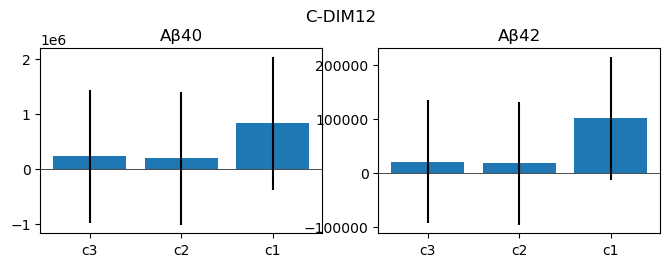

In [48]:
fig, ax = freq_res_plotter(TI, experiment)
attila_utils.savefig(fig, 'freqres-Ab-release-H4-' + TI) 

### Bayesian regression eliminates false positives

['named-figure/sampled-curves-Ab-release-H4-TI1-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-TI1-no-curves.pdf']

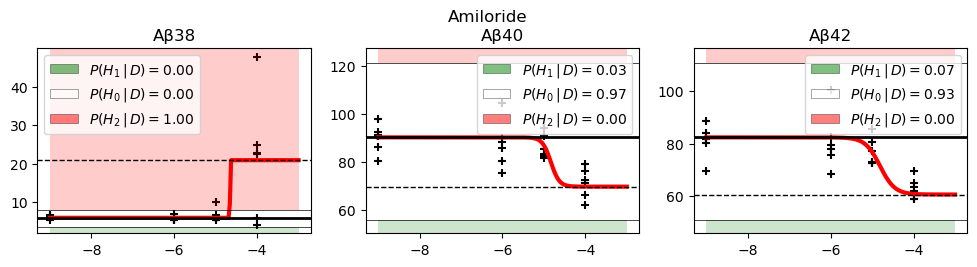

In [49]:
TI = 'TI1'
experiment = 'Aβ release (H4 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI + fpath_suffix) 

['named-figure/freqres-Ab-release-H4-TI1.png',
 'named-figure/freqres-Ab-release-H4-TI1.pdf']

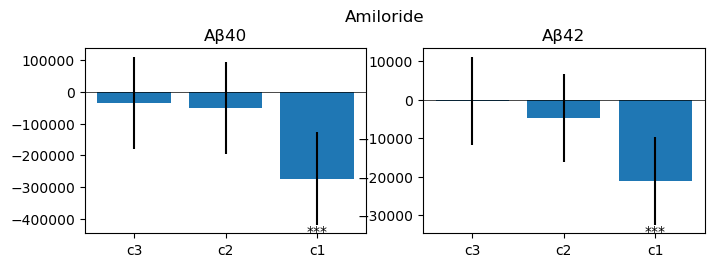

In [50]:
fig, ax = freq_res_plotter(TI, experiment)
attila_utils.savefig(fig, 'freqres-Ab-release-H4-' + TI) 

['named-figure/sampled-curves-Ab-release-H4-TI10-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-TI10-no-curves.pdf']

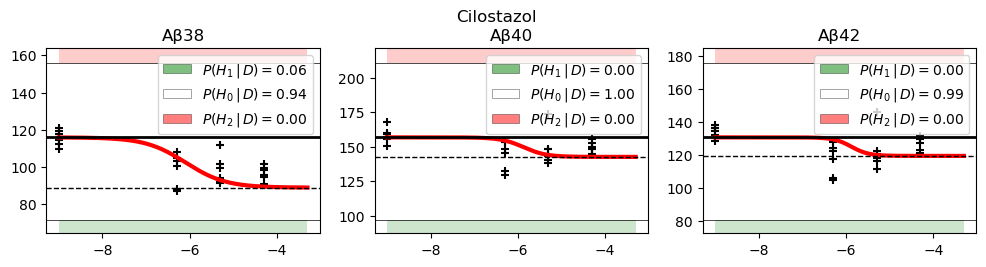

In [51]:
TI = 'TI10'
experiment = 'Aβ release (H4 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI + fpath_suffix) 

['named-figure/sampled-curves-Ab-release-H4-TI15-no-curves.png',
 'named-figure/sampled-curves-Ab-release-H4-TI15-no-curves.pdf']

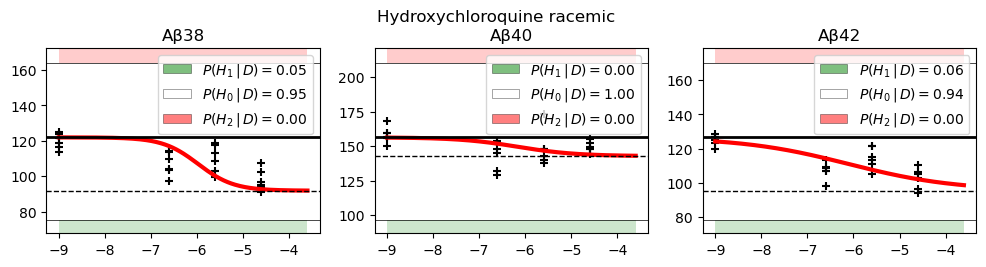

In [52]:
TI = 'TI15'
experiment = 'Aβ release (H4 cells)'
fig, ax = TI_plotter(TI, experiment)
attila_utils.savefig(fig, 'sampled-curves-Ab-release-H4-' + TI + fpath_suffix) 

In [53]:
%connect_info

{
  "shell_port": 64929,
  "iopub_port": 64930,
  "stdin_port": 64931,
  "control_port": 64933,
  "hb_port": 64932,
  "ip": "127.0.0.1",
  "key": "0af228ec-a18f68e59216dec23f337a0b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-02-14-cell-bayes/2024-02-14-cell-bayes.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ffe906e3-f068-4f3d-9f75-f16cfc1dd4b7.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
